In [53]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [3]:
df_label = pd.read_csv("existence_tokenized.csv")

In [4]:
df_label

,Unnamed: 0,row_num,rater1,rater2,rater3,rater4,rater5,rater6,rater7,rater8,...,they_TA,we_TA,you_TA,num_ratings,mturk_rating,apology,Brand,Label,tokenized_words,normalized_words
0,0,1,20,20.0,21.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.090909,0.068182,3,20.333333,True,Marriot,1,"['Dear', 'Alisunshine20,Welcome', 'to', 'New',...","['dear', 'alisunshine20,welcome', 'new', 'york..."
1,1,2,10,-30.0,-22.0,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.067010,0.061856,3,-14.000000,False,Marriot,0,"['Dear', 'SeaTurtle01,Thank', 'you', 'for', 'c...","['dear', 'seaturtle01,thank', 'choosing', 'rec..."
2,2,3,20,30.0,30.0,30.0,NaN,NaN,NaN,NaN,...,0.000000,0.084507,0.098592,4,27.500000,True,Marriot,1,"['Dear', 'Dolcevitax', 'We', 'are', 'delighted...","['dear', 'dolcevitax', 'delighted', 'hear', 'e..."
3,3,4,30,30.0,30.0,30.0,NaN,NaN,NaN,NaN,...,0.000000,0.093023,0.058140,4,30.000000,True,Marriot,1,"['Dear', 'DFWtrave', ""I'm"", 'very', 'sorry', '...","['dear', 'dfwtrave', 'sorry', 'poor', 'experie..."
4,4,5,30,30.0,5.0,30.0,NaN,NaN,NaN,NaN,...,0.000000,0.009174,0.082569,4,23.750000,True,Marriot,1,"['Hi', '@rugwag', 'Thank', 'you', 'very', 'muc...","['hi', '@rugwag', 'thank', 'taking', 'time', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,775,896,30,30.0,30.0,30.0,20.0,30.0,NaN,NaN,...,0.009434,0.009434,0.056604,6,28.333333,True,Al Bahar,1,"['Hi', 'Our', 'hotel', 'is', 'typically', 'lau...","['hi', 'hotel', 'typically', 'lauded', 'fast',..."
776,776,897,20,-20.0,30.0,16.0,9.0,30.0,-9.0,NaN,...,0.009772,0.019544,0.052117,7,10.857143,True,enVision,1,"['We', ""'re"", 'sorry', 'to', 'hear', 'that', '...","['sorry', 'hear', 'disappointed', 'recent', 's..."
777,777,898,9,30.0,30.0,30.0,20.0,30.0,21.0,30.0,...,0.000000,0.052632,0.078947,11,26.272727,True,enVision,1,"['Greetings', 'Mary', 'B', 'On', 'behalf', 'of...","['greetings', 'mary', 'b', 'behalf', 'manageme..."
778,778,899,-9,30.0,27.0,30.0,NaN,NaN,NaN,NaN,...,0.000000,0.024390,0.085366,4,19.500000,True,enVision,1,"['Greetings', 'Harpist77,Thank', 'you', 'for',...","['greetings', 'harpist77,thank', 'taking', 'ti..."


In [45]:
normalized_text = []
for index, row in df_label.iterrows():
    normalized_text.append(row["normalized_words"][1:-1].replace("'", "").replace(" ","").split(","))

In [46]:
normalized_text

[['dear',
  'alisunshine20',
  'welcome',
  'new',
  'york',
  'city',
  'thank',
  'choosing',
  'hotel',
  'experience',
  'city',
  'time',
  'goal',
  'exceed',
  'guests',
  'expectations',
  'regret',
  'found',
  'lacking',
  'couple',
  'aspects',
  'stay',
  'appreciate',
  'recognizing',
  'strengths',
  'providing',
  'areas',
  'opportunity',
  'hope',
  'chance',
  'better',
  'serve',
  'future',
  'visit',
  'sincerely',
  'craig',
  'kepplegeneral',
  'manager'],
 ['dear',
  'seaturtle01',
  'thank',
  'choosing',
  'recent',
  'trip',
  'new',
  'york',
  'appreciate',
  'taking',
  'time',
  'post',
  'review',
  'experience',
  'continue',
  'best',
  'foot',
  'forward',
  'continue',
  'creating',
  'great',
  'experiences',
  'guests',
  'hotel',
  'speaking',
  'members',
  'management',
  'team',
  'looked',
  'issue',
  'verified',
  'rates',
  'charged',
  'rates',
  'originally',
  'booked',
  'changes',
  'reservation',
  'time',
  'booking',
  'willing',
  

In [ ]:
### Use google pre-trained model

In [50]:
googlenews_w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary = True)

In [54]:
def represent_by_w2v():
    """
    represent reviews by averaging word embeddings 
    """
    df_w2v = []
    wd_vecs = []
    for response in normalized_text:
        for wd in response:
            if(wd in googlenews_w2v_model):
                wd_vecs.append(googlenews_w2v_model[wd])
        df_w2v.append(list(np.mean(wd_vecs, axis=0)))
    return df_w2v

df_w2v = represent_by_w2v()

In [56]:
len(df_w2v[0])

300

In [57]:
features = np.array(df_w2v)

In [58]:
features

array([[-0.08676825,  0.05273522,  0.03296195, ..., -0.02220196,
         0.00115246, -0.04730733],
       [-0.05789555,  0.06020819,  0.01709426, ..., -0.02326081,
         0.03016477, -0.04969602],
       [-0.06233327,  0.06028904,  0.01068895, ..., -0.03488237,
         0.02915687, -0.03594957],
       ...,
       [-0.05015585,  0.04385194,  0.00056406, ..., -0.02153337,
         0.01309965, -0.03105268],
       [-0.0501903 ,  0.04388467,  0.00058781, ..., -0.0215639 ,
         0.01310098, -0.03102315],
       [-0.05016238,  0.04388065,  0.00059571, ..., -0.02159515,
         0.01311102, -0.03108501]], dtype=float32)

In [60]:
import sklearn.decomposition
import sklearn.manifold

In [61]:
pcaWords_hero = sklearn.decomposition.PCA(n_components = 50).fit(features)
reducedPCA_data = pcaWords_hero.transform(features)
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [65]:
tsneWords

array([[ 2.3335347, -2.6678004],
       [ 1.2654911, -3.0862248],
       [ 1.4254127, -2.9231956],
       ...,
       [65.021515 , -5.5714836],
       [65.18834  , -5.5343785],
       [65.07259  , -5.5158024]], dtype=float32)

In [66]:
df_component = pd.DataFrame(tsneWords, columns = ["c1", "c2"])

In [69]:
df_component["label"]  = df_label.Label.to_list()

In [70]:
df_component

,c1,c2,label
0,2.333535,-2.667800,1
1,1.265491,-3.086225,0
2,1.425413,-2.923196,1
3,1.670191,-2.707523,1
4,1.708414,-2.431011,1
...,...,...,...
775,65.330917,-5.127673,1
776,64.878258,-5.546669,1
777,65.021515,-5.571484,1
778,65.188339,-5.534379,1


In [72]:
df_top_pos = df_component[df_component["label"] == 1]
df_top_neg = df_component[df_component["label"] == 0]

In [74]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(519, 3)


In [75]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [77]:
X_data = data_upsampled[["c1","c2"]]
y_data = data_upsampled['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [78]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1").fit(X_train, y_train) 

In [79]:
print(cross_val_score(lgclf, X_train, y_train, cv=10))

[0.5212766  0.5212766  0.4787234  0.58510638 0.66666667 0.59139785
 0.50537634 0.50537634 0.51612903 0.5483871 ]


In [80]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.5673076923076923


In [81]:
lgclf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[28, 24],
       [21, 31]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


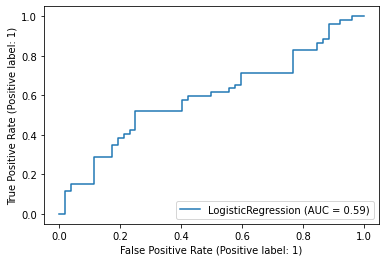

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [84]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])

# preview
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [85]:
df_feature

,Features,Coefficient
0,c1,-0.006368
1,c2,0.005638
